In [ ]:
%matplotlib notebook
DEFAULT_FIGSIZE = (12, 8)

import os
import pickle
import itertools
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style('darkgrid', {'legend.frameon': True})
import pandas as pd

sys.path.append('..')
from antlia.record import Record, load_file
from antlia.dtype import load_converted_record
from antlia import plot_braking as braking
from antlia import dtc
from antlia.plotdf import plotjoint
from antlia import trial2

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = DEFAULT_FIGSIZE
mpl.rcParams['legend.facecolor'] = 'white'

colors = sns.color_palette('Paired', 10)

In [39]:
import IPython.display

def display_animation(animation):
    plt.close(animation._fig)
    return IPython.display.HTML(animation.to_jshtml())

In [3]:
bicycle_record_files = [
    '2018-04-23_12-30-38.csv',
    '2018-04-23_13-13-36.csv',
    '2018-04-23_14-22-58.csv',
    '2018-04-23_15-27-48.csv',
    '2018-04-23_16-32-27.csv',
    '2018-04-23_17-14-00.csv',
    '2018-04-25_09-27-24.csv',
    '2018-04-25_10-20-28.csv',
    '2018-04-25_11-34-04.csv',
    '2018-04-25_12-41-48.csv',
    '2018-04-25_14-14-57.csv',
    '2018-04-25_14-49-39.csv',
    '2018-04-25_16-15-57.csv',
    '2018-04-25_17-23-04.csv',
    '2018-04-26_11-19-31.csv',
    '2018-04-26_14-50-53.csv',
    '2018-04-27_14-59-52.csv'
]

lidar_record_files = [
    '2018-04-23-12-17-37_0.pkl.gz',
    '2018-04-23-13-01-00_0.pkl.gz',
    '2018-04-23-14-10-33_0.pkl.gz',
    '2018-04-23-15-15-14_0.pkl.gz',
    '2018-04-23-16-19-35_0.pkl.gz',
    '2018-04-23-17-01-24_0.pkl.gz',
    '2018-04-25-09-15-00_0.pkl.gz',
    '2018-04-25-10-07-31_0.pkl.gz',
    '2018-04-25-11-21-29_0.pkl.gz',
    '2018-04-25-12-29-06_0.pkl.gz',
    '2018-04-25-14-02-15_0.pkl.gz',
    '2018-04-25-14-36-55_0.pkl.gz',
    '2018-04-25-16-03-24_0.pkl.gz',
    '2018-04-25-17-10-07_0.pkl.gz',
    '2018-04-26-11-07-38_0.pkl.gz',
    '2018-04-26-14-38-03_0.pkl.gz',
    '2018-04-27-14-47-07_0.pkl.gz',
    '2018-04-27-15-39-56_0.pkl.gz'
]

i = 3 # rider
f1 = bicycle_record_files[i]
f2 = lidar_record_files[i]

with open('../config.p', 'rb') as f:
        bicycle_calibration = pickle.load(f)

data_dir = '../../data/comfort/'
bicycle_rec = load_file(
    os.path.join(data_dir, f1),
    bicycle_calibration['convbike'])
lidar_rec = load_converted_record(
    os.path.join(data_dir, f2))

r = Record(lidar_rec, bicycle_rec)
r.sync()

-9.2400000000000091

In [4]:
r._calculate_trials2()

<IPython.core.display.Javascript object>


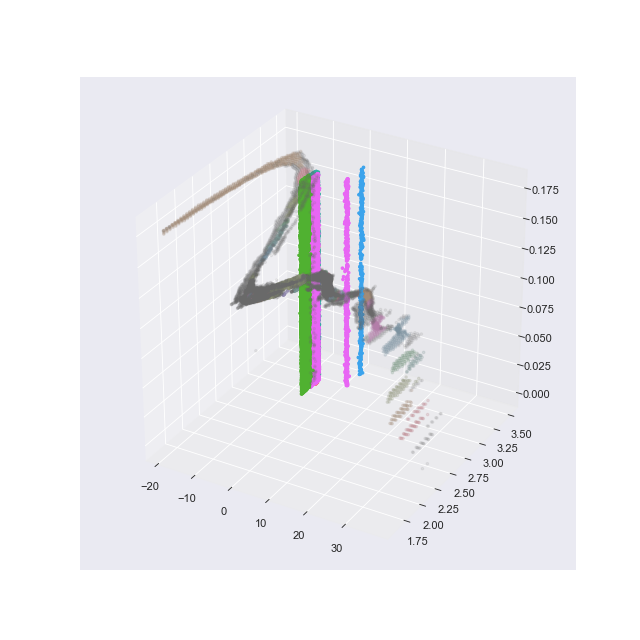

<IPython.core.display.Javascript object>


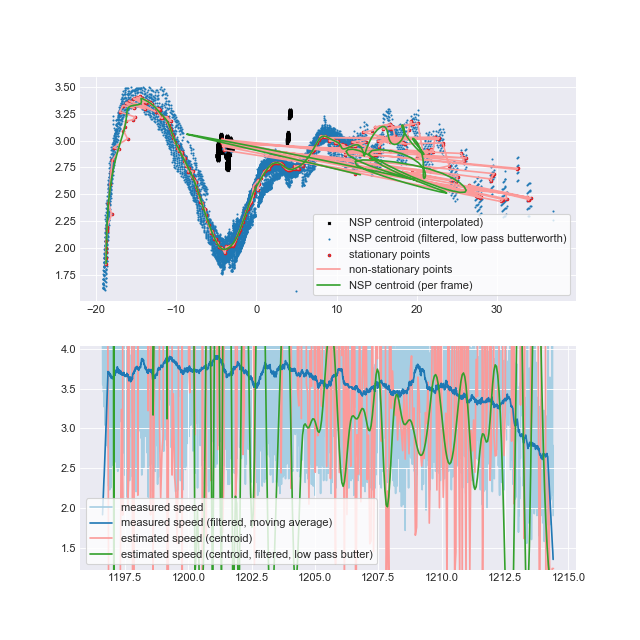

In [78]:
import itertools
i = 12

plt.close('all')

stationary_colors = np.roll(sns.husl_palette(6), -1, axis=0)[1:]
colors = sns.husl_palette(8, l=0.6, s=0.3)
s = itertools.cycle(stationary_colors)
c = itertools.cycle(colors)

def g(stationary):
    def f(cluster):
        kw = {}
        if cluster.label == -1:
            kw['color'] = 'dimgray'
            kw['alpha'] = 0.1 if stationary else 0.3
        else:
            if cluster.stationary:
                kw['color'] = next(s)
                kw['alpha'] = 1 if stationary else 0.01
            else:
                kw['color'] = next(c)
                kw['alpha'] = 0.2 if stationary else 1
        return kw
    return f

second_cyclist_bbmask = [
    {
       'xlim': (-20, -10),
       'ylim': (1, 1.6)
    },
    {
       'xlim': (-10, -4),
       'ylim': (1, 1.2)
    },
    {
       'xlim': (-4, 5),
       'ylim': (1, 1.6)
    },
    {
       'xlim': (5, 60),
       'ylim': (1, 2.1)
    }
]
r.trials[i]._detect_event(invalid_bb=second_cyclist_bbmask)
r.trials[i].event._identify_stationary(
    zscale=0.0005,
    hdbscan_kw={
        'min_cluster_size': 30,
        'min_samples': 15
        
    },
    invalid_bb=second_cyclist_bbmask)
r.trials[i].event.plot_clusters(plot_cluster_func=g(True), figsize=(8, 8))
#
## reset cyclers
#s = itertools.cycle(stationary_colors)
#c = itertools.cycle(colors)
#r.trials[i].event.plot_clusters(plot_cluster_func=g(False), figsize=(8, 8))

r.trials[i].event.plot_trajectory(figsize=(8, 8))
plt.show()

trial 0


<IPython.core.display.Javascript object>


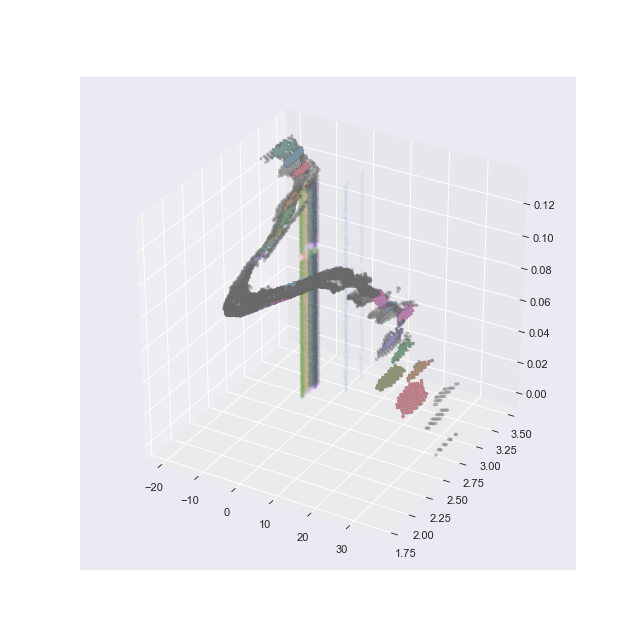

<IPython.core.display.Javascript object>


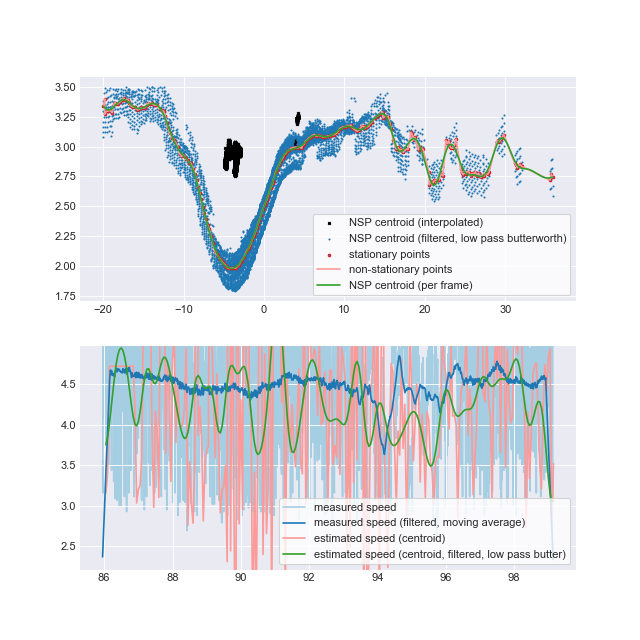

trial 1


<IPython.core.display.Javascript object>


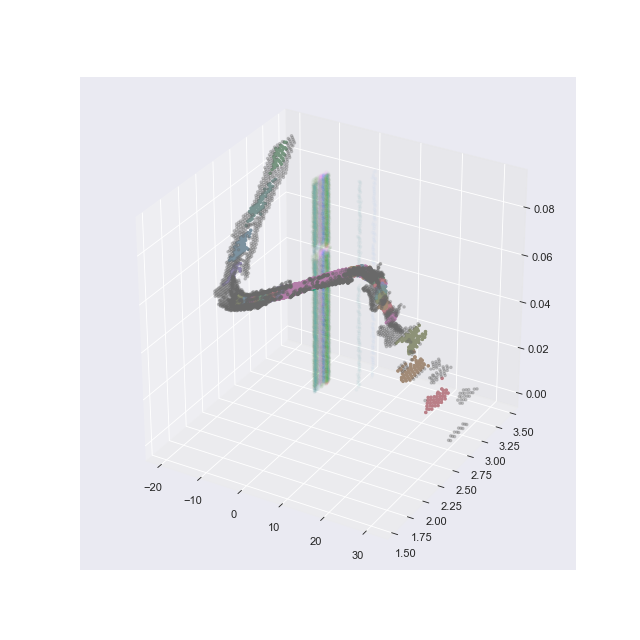

<IPython.core.display.Javascript object>


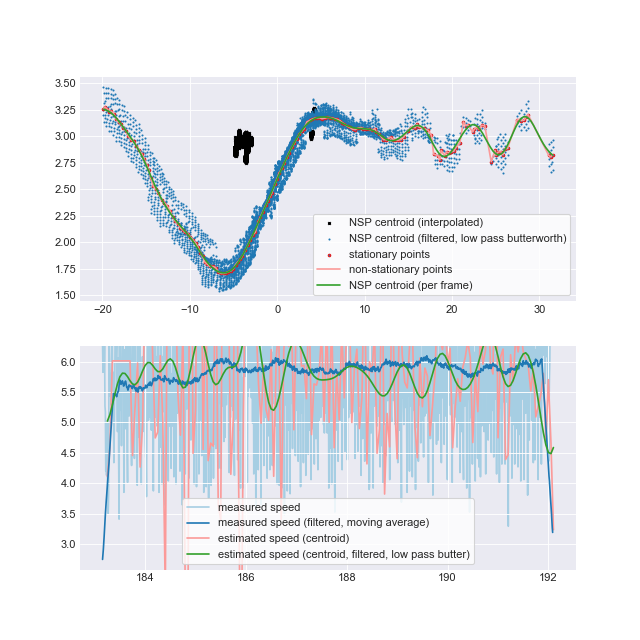

trial 2


<IPython.core.display.Javascript object>


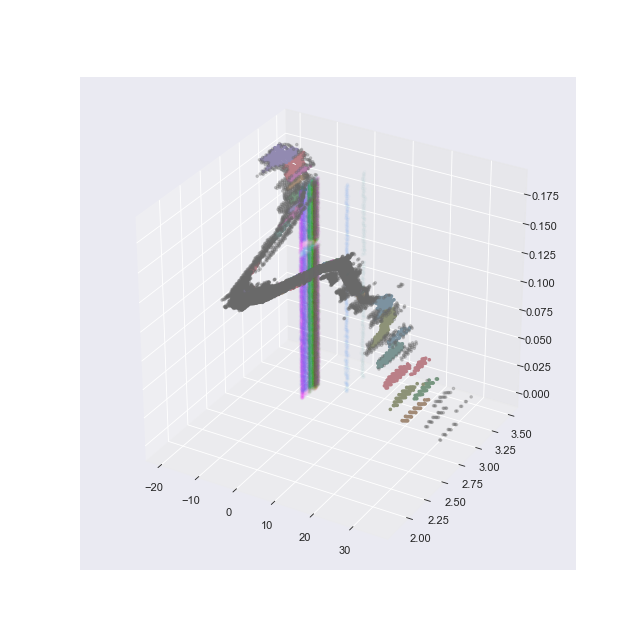

<IPython.core.display.Javascript object>


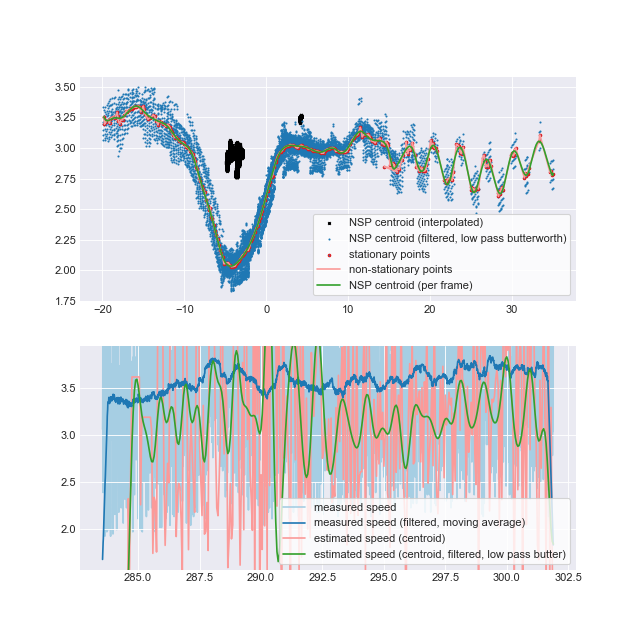

trial 3


<IPython.core.display.Javascript object>


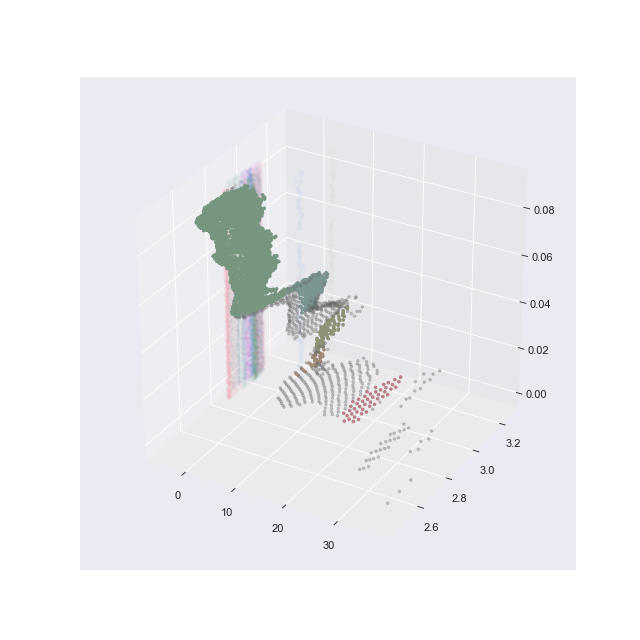

<IPython.core.display.Javascript object>


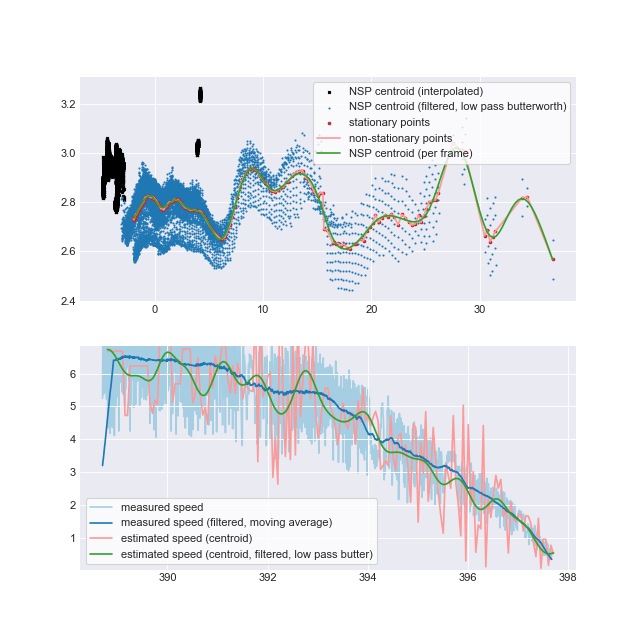

trial 4


<IPython.core.display.Javascript object>


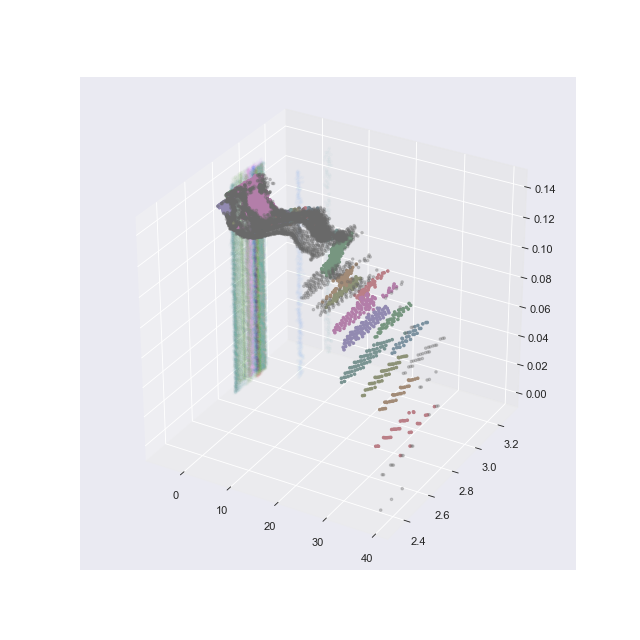

<IPython.core.display.Javascript object>


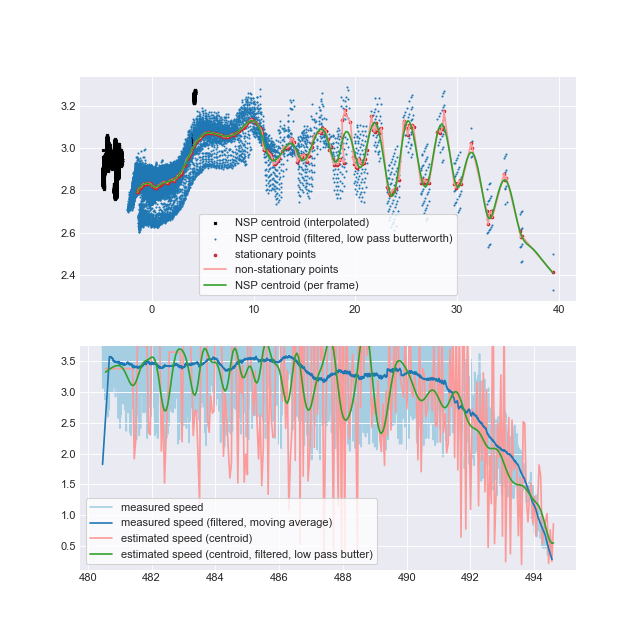

trial 5


<IPython.core.display.Javascript object>


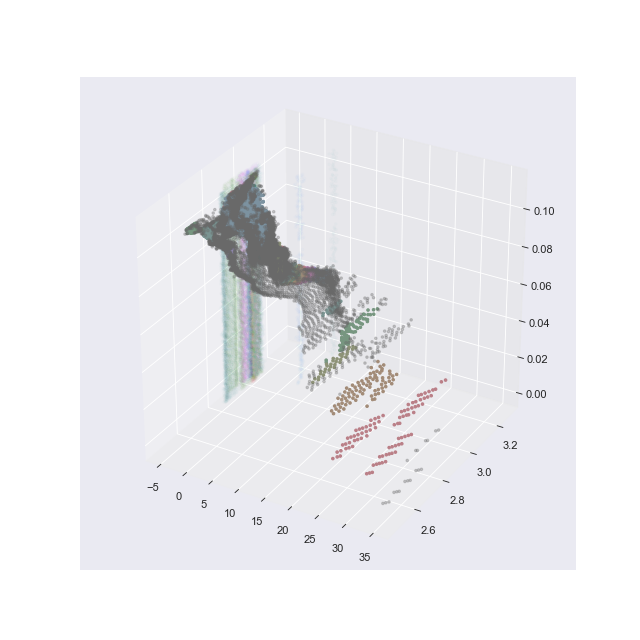

<IPython.core.display.Javascript object>


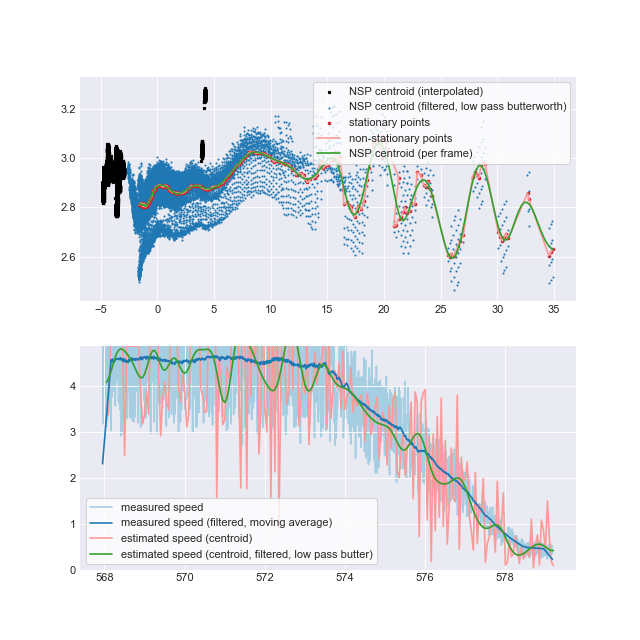

trial 6


<IPython.core.display.Javascript object>


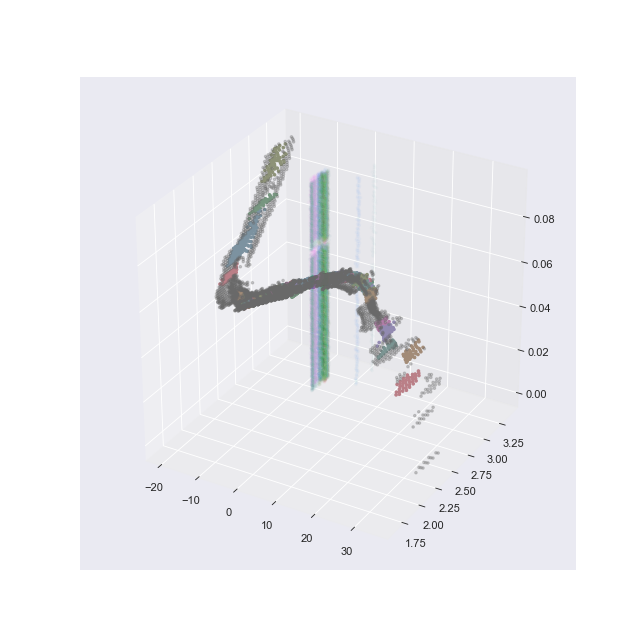

<IPython.core.display.Javascript object>


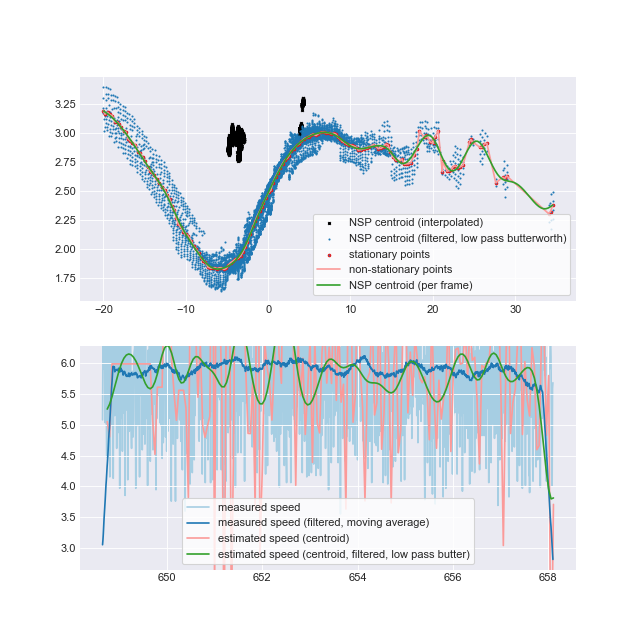

trial 7


<IPython.core.display.Javascript object>


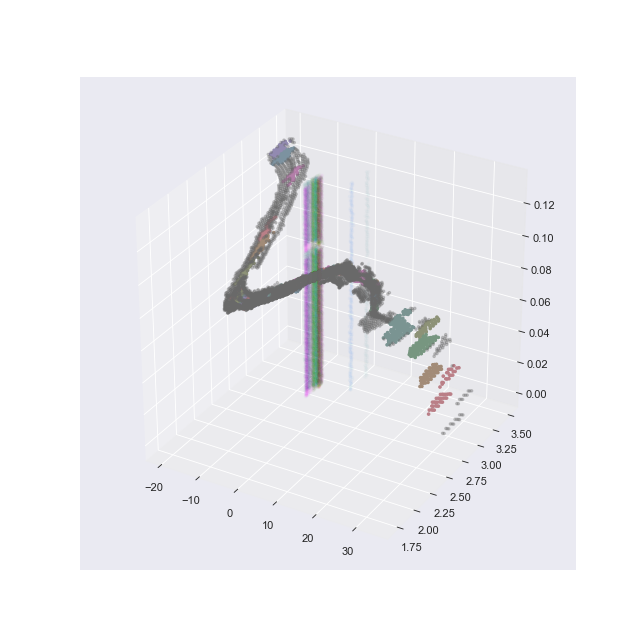

<IPython.core.display.Javascript object>


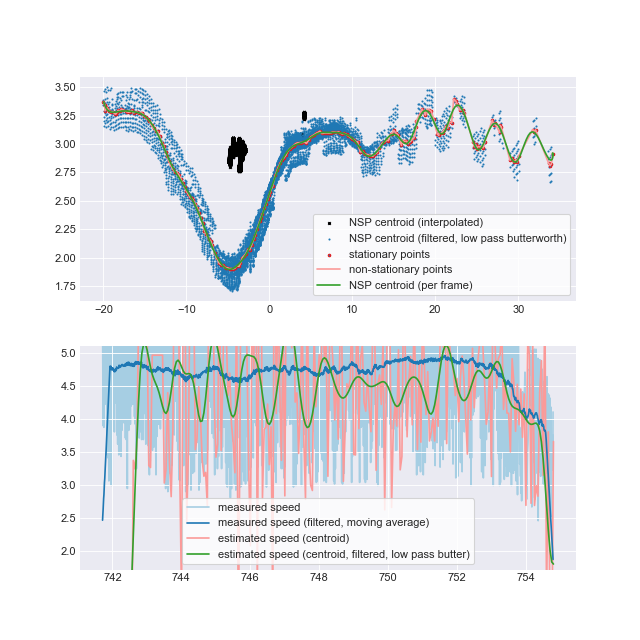

trial 8


<IPython.core.display.Javascript object>


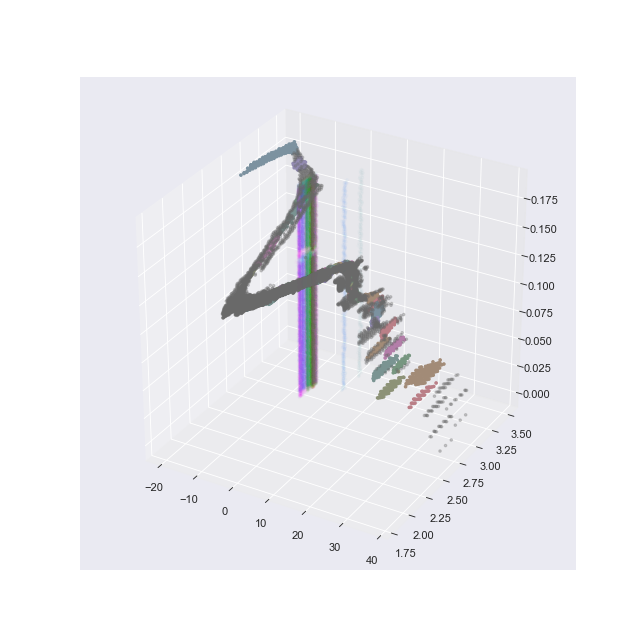

<IPython.core.display.Javascript object>


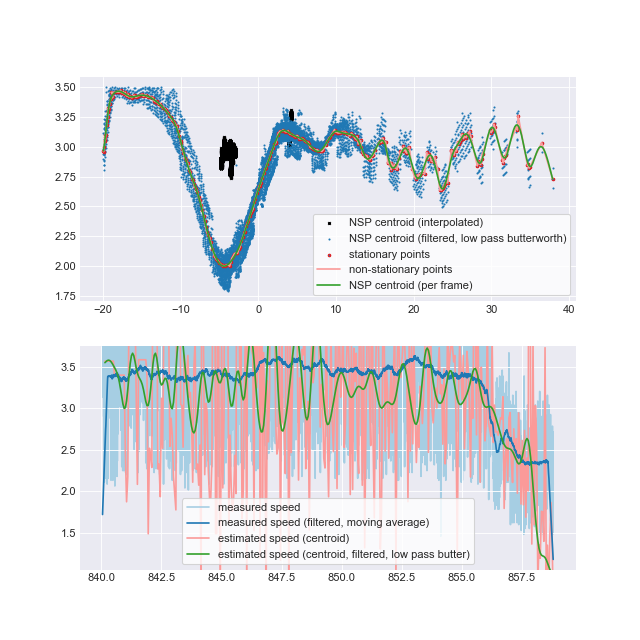

trial 9


<IPython.core.display.Javascript object>


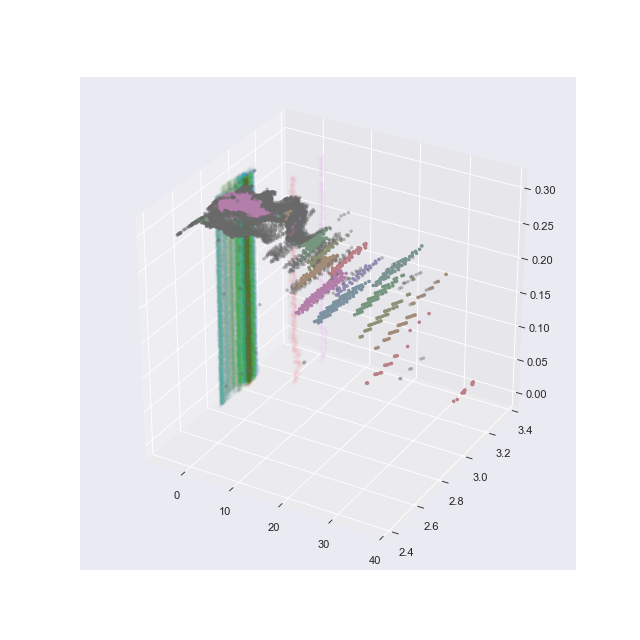

<IPython.core.display.Javascript object>


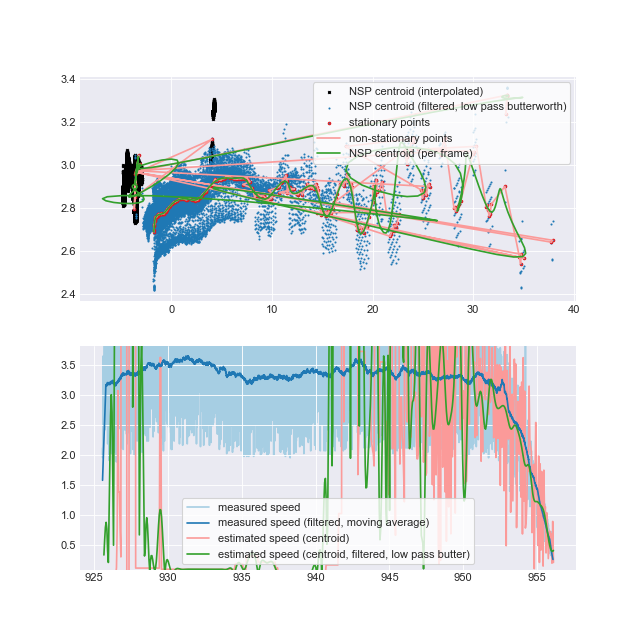

trial 10


/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


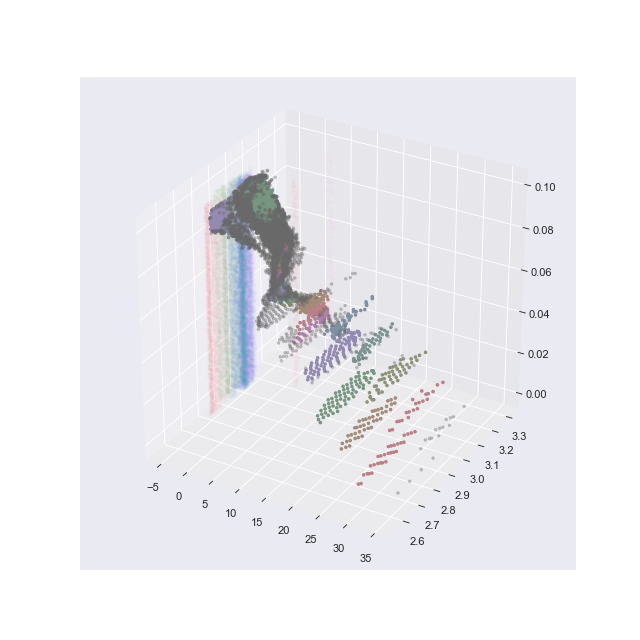

<IPython.core.display.Javascript object>


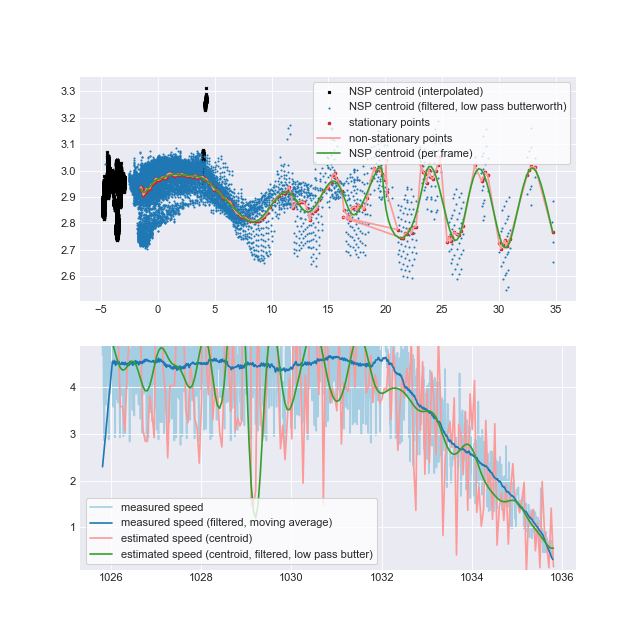

trial 11


/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


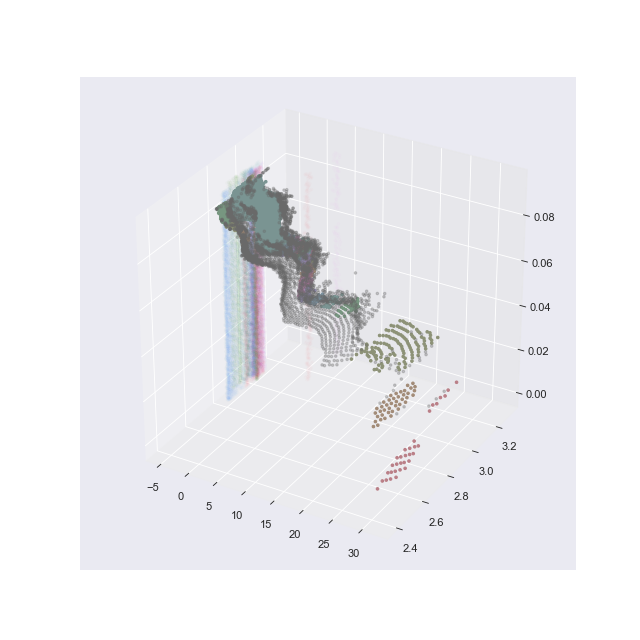

<IPython.core.display.Javascript object>


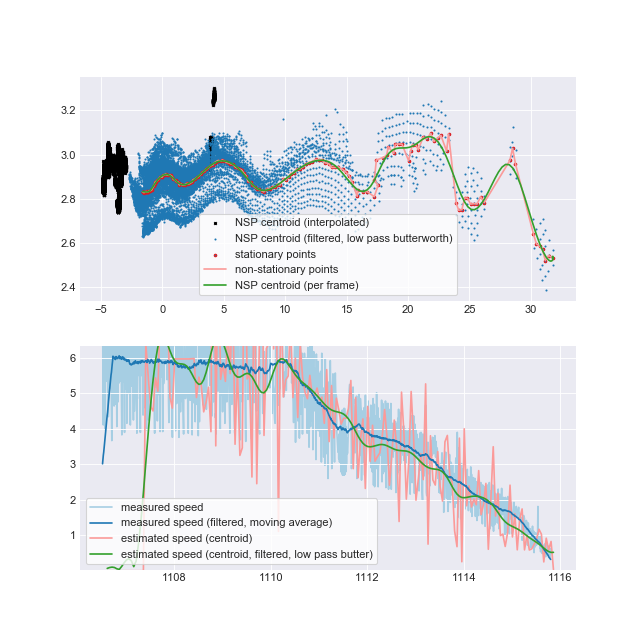

trial 12


/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


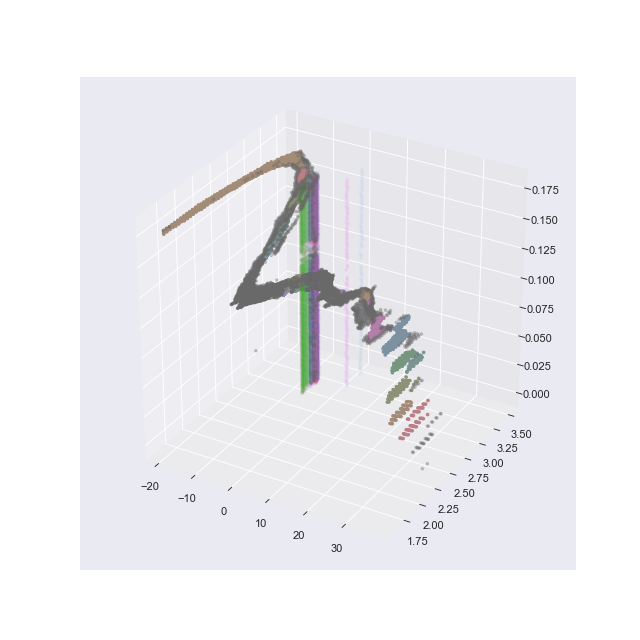

<IPython.core.display.Javascript object>


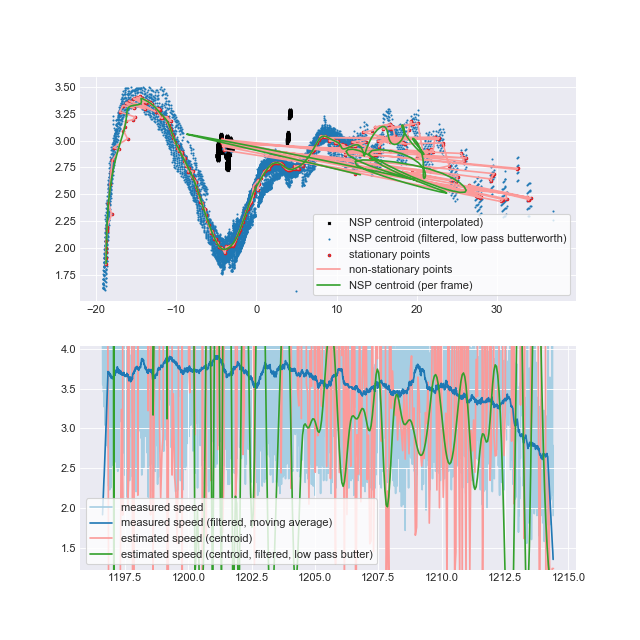

trial 13


/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


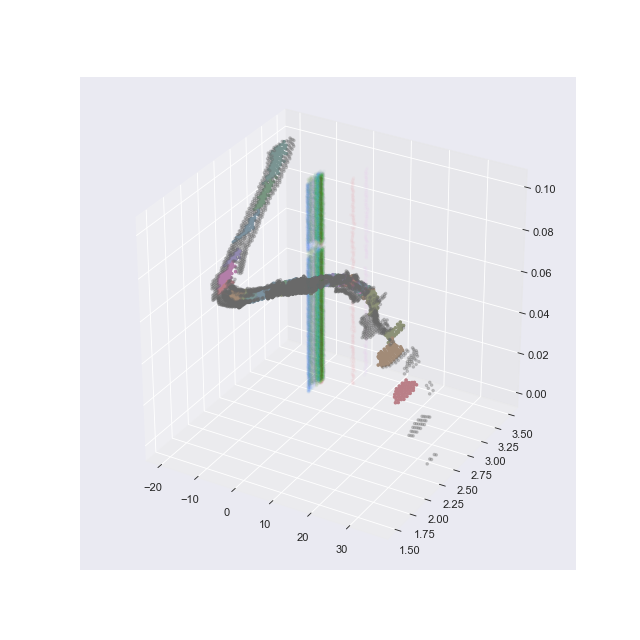

<IPython.core.display.Javascript object>


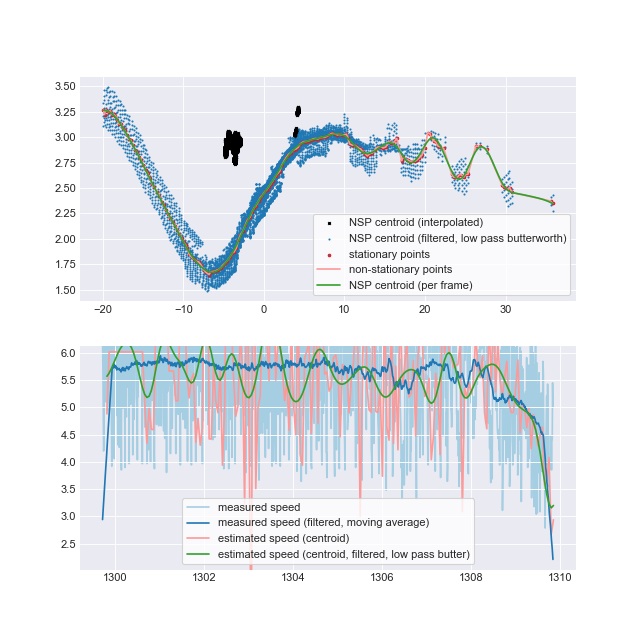

trial 14


/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


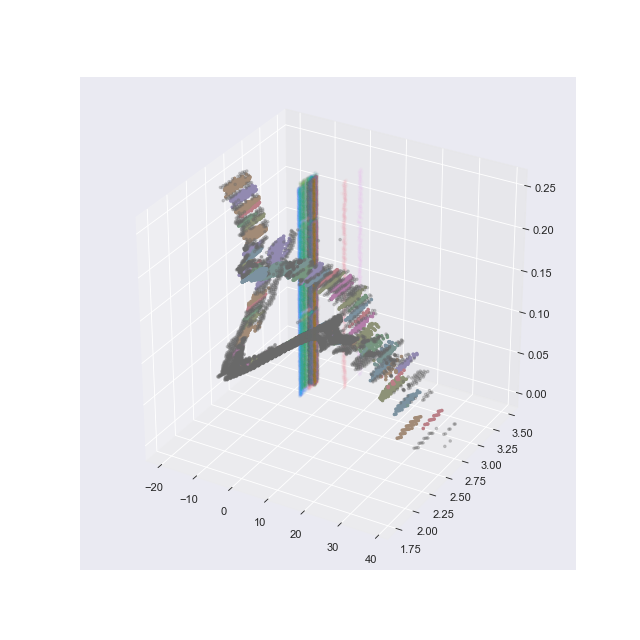

<IPython.core.display.Javascript object>


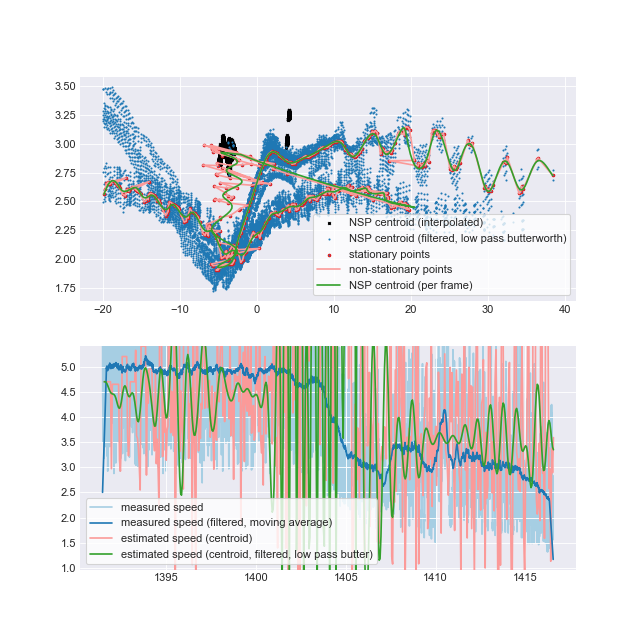

trial 15


/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


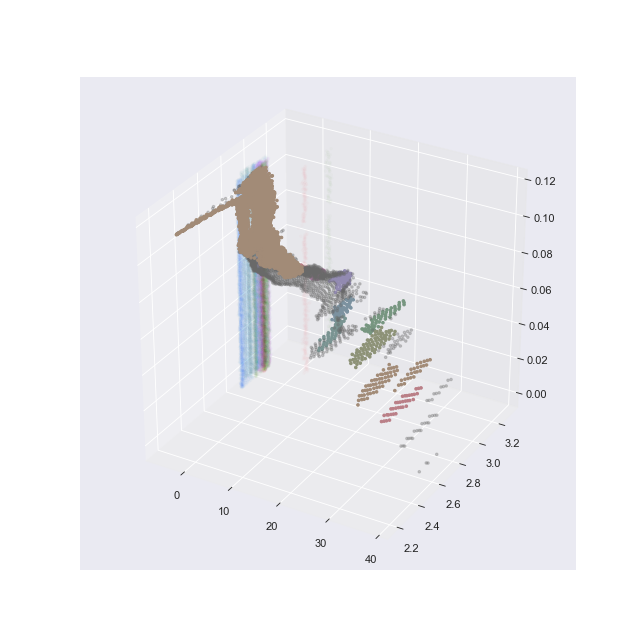

<IPython.core.display.Javascript object>


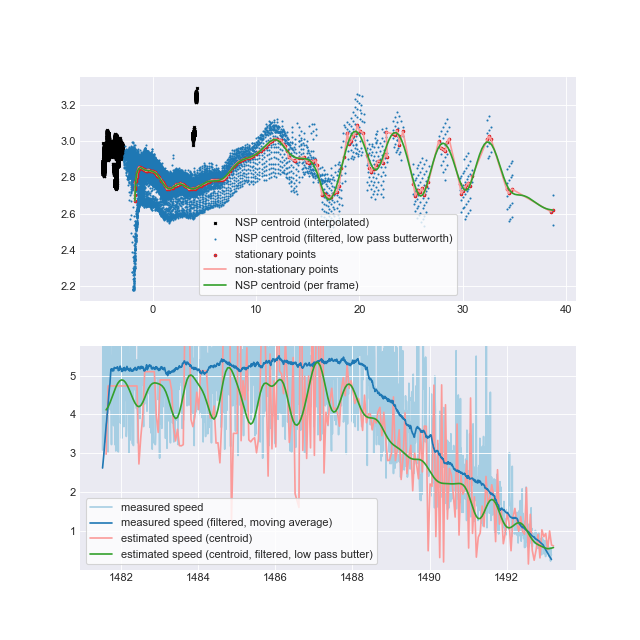

trial 16


/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


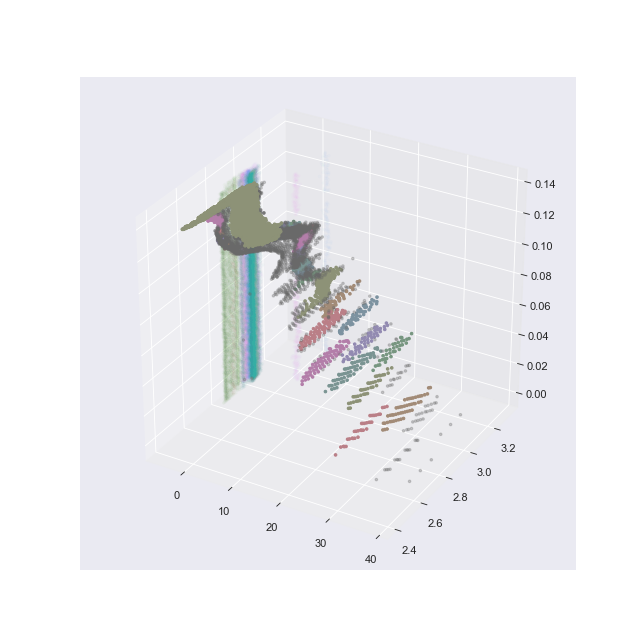

<IPython.core.display.Javascript object>


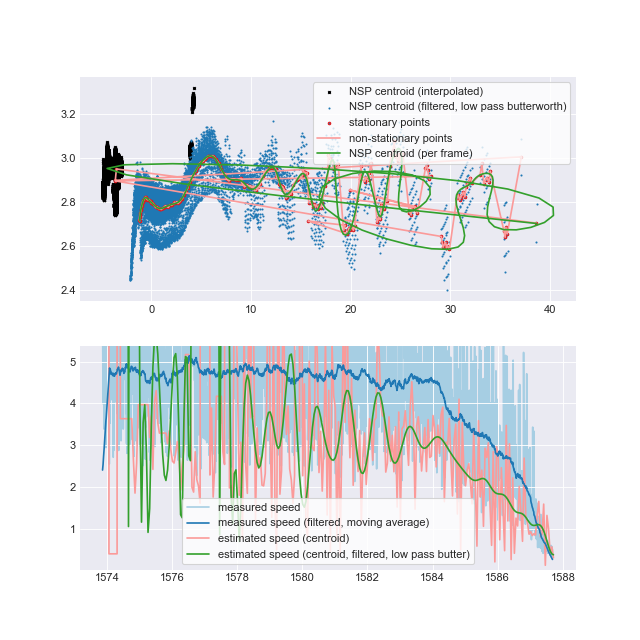

trial 17


/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


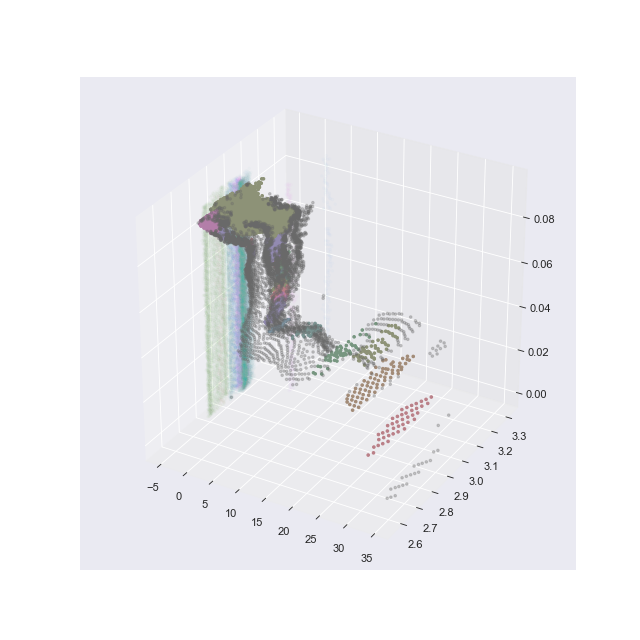

<IPython.core.display.Javascript object>


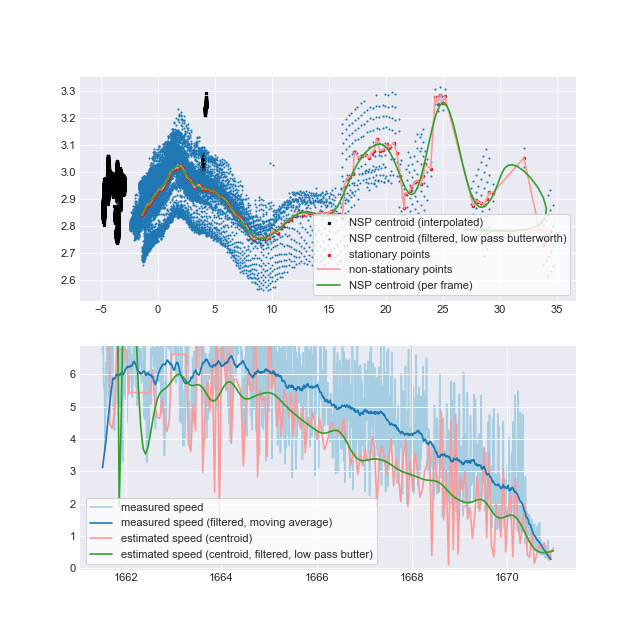

In [77]:
plt.close('all')

for i, tr in enumerate(r.trials):
    print('trial', i)
    s = itertools.cycle(stationary_colors)
    c = itertools.cycle(colors)
    tr.event._identify_stationary(
        zscale=0.0005,
        hdbscan_kw={
            'min_cluster_size': 30,
            'min_samples': 15
        },
        invalid_bb=second_cyclist_bbmask
    )
    tr.event.plot_clusters(plot_cluster_func=g(False), figsize=(8, 8))
    tr.event.plot_trajectory(figsize=(8, 8))

plt.show()